In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
M_sun    = 1.9891e+30 # kg
M_earth  = 5.9742412e+24 # kg
year     = 365.25*24*60*60 # s
AU       = 1.4959787e+11 # m
R_earth  = 6371010 # m
G        = 6.67384e-11 # m^3 / kg s^2

In [3]:
M = M_sun
r0 = AU
v0 = 2*pi*r0/year
dt = 60*60
dt_sample = 60*60

In [4]:
t = 0
t_sample = -inf
x = asarray([r0,0,0])
v = asarray([0,v0,0])

all_t = []
all_x = []
all_v = []
all_a = []

while t<10*year:
    r = norm(x)
    ux = x/r
    uv = v/norm(v)
    a = -G*M/r**2*ux + (0.01 if t<2*365.25*86400 else 0)*G*M/r0**2*uv
    v += a*dt
    x += v*dt
    t += dt

    if t > t_sample+dt_sample:
        all_a.append(a.copy())
        all_v.append(v.copy())
        all_x.append(x.copy())
        all_t.append(t)
        t_sample = t

all_x = column_stack(all_x)
all_v = column_stack(all_v)
all_a = column_stack(all_a)

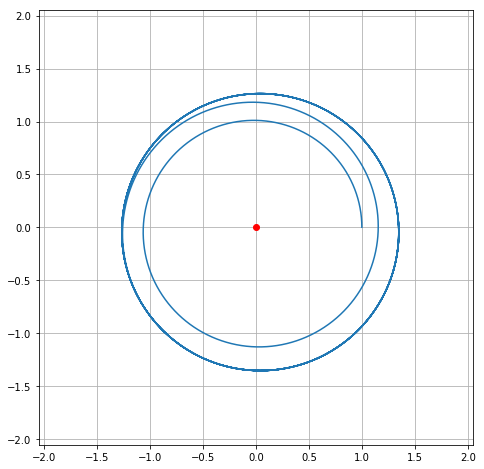

In [5]:
figure(figsize(8,8))
plot(all_x[0,:]/AU, all_x[1,:]/AU)
plot(0,0,'or')
axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/AU*1.5)
grid()

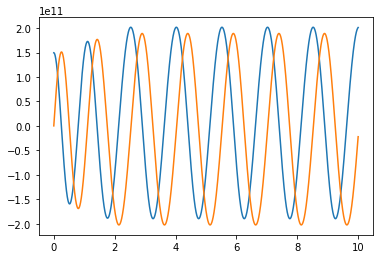

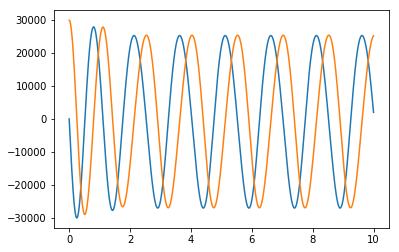

In [6]:
figure(figsize=(6,4))
plot(asarray(all_t)/year, all_x[0,:], asarray(all_t)/year, all_x[1,:])

figure(figsize=(6,4))
plot(asarray(all_t)/year, all_v[0,:], asarray(all_t)/year, all_v[1,:])

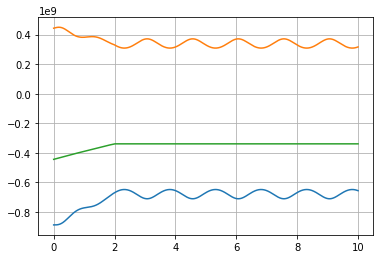

In [7]:
figure(figsize=(6,4))
plot(asarray(all_t)/year, -G*M/norm(all_x, axis=0),
     asarray(all_t)/year, 0.5*norm(all_v, axis=0)**2,
     asarray(all_t)/year, 0.5*norm(all_v, axis=0)**2 - G*M/norm(all_x, axis=0))
grid()

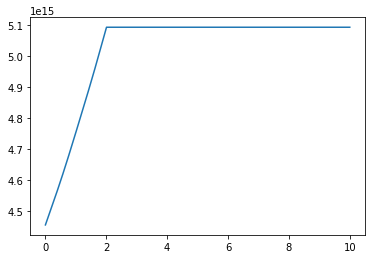

In [8]:
figure(figsize=(6,4))
plot(asarray(all_t)/year, norm(cross(all_x,all_v,axis=0),axis=0))